In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data into Python environment.

In [3]:
df=pd.read_csv("Comcast_telecom_complaints_data.csv")

In [4]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [5]:
df.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [6]:
df['Date_month_year']=pd.to_datetime(df['Date_month_year'])

In [7]:
df['new_date']=pd.to_datetime(df['Date'] + " "+df['Time'] )

In [8]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,new_date
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-04-08 10:22:56
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-05-07 11:59:35
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26


In [9]:
df['Monthly_Complaint']=df['Date_month_year'].apply(lambda x:x.month)
df['Daily_Complaint']=df['Date_month_year'].apply(lambda x: x.day)

In [10]:
df=df.set_index(df['new_date'])

# Provide the trend chart for the number of complaints at monthly and daily granularity levels.

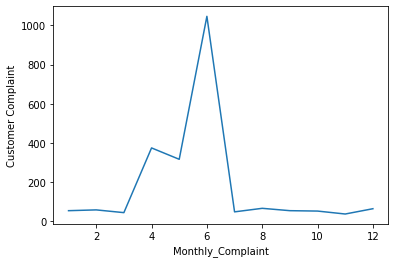

In [11]:
new_data=df.groupby('Monthly_Complaint').count().reset_index()
lp=sns.lineplot(x='Monthly_Complaint', y='Customer Complaint', data=new_data)

(0.0, 34.0)

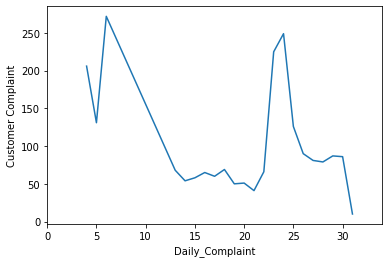

In [12]:
new_data_day=df.groupby('Daily_Complaint').count().reset_index()
lp=sns.lineplot(x='Daily_Complaint', y='Customer Complaint', data=new_data_day)
ax=lp.axes
ax.set_xlim(0,34)


# Provide a table with the frequency of complaint types.

In [13]:
df['Customer Complaint']=df['Customer Complaint'].str.title()
frequency=df['Customer Complaint'].value_counts().to_frame().reset_index().rename(columns={'index':'Complaint Type','Customer Complaint':'Frequency'})

In [14]:
frequency

,Complaint Type,Frequency
0,Comcast,102
1,Comcast Data Cap,30
2,Comcast Internet,29
3,Comcast Data Caps,21
4,Comcast Billing,18
...,...,...
1735,Comcast Will Not Help Us Please Help,1
1736,Comcast Internet Service - Billing Problem,1
1737,Comcast Data Cap At 300Gb,1
1738,Comcast Inflated Internet Pricing,1


# Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

In [45]:
frequency.head(1)

,Complaint Type,Frequency
0,Comcast,102


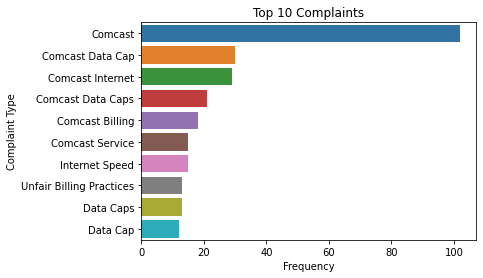

In [44]:
dummy_complaint=sns.barplot(y=frequency['Complaint Type'].head(10),x=frequency.Frequency.head(10))
dummy_complaint.set_title("Top 10 Complaints")
ax=dummy_complaint.axes


In [22]:
df.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

# Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed

In [23]:
df['newStatus']=['Open' if status=='Open' or status=='Pending' else 'Closed' for status in df['Status']]

In [24]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,new_date,Monthly_Complaint,Daily_Complaint,newStatus
new_date,,,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,4,22,Closed
2015-04-08 10:22:56,223441,Payment Disappear - Service Got Disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-04-08 10:22:56,8,4,Closed
2015-04-18 09:55:47,242732,Speed And Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,4,18,Closed
2015-05-07 11:59:35,277946,Comcast Imposed A New Usage Cap Of 300Gb That ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-05-07 11:59:35,7,5,Open
2015-05-26 13:25:26,307175,Comcast Not Working And No Service To Boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,5,26,Closed


In [27]:
df.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename(columns={0:"Count"})[:4]

,State,Count
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164


In [32]:
dummy=df.groupby(["State","newStatus"]).size()
dummy

State          newStatus
Alabama        Closed       17
               Open          9
Arizona        Closed       14
               Open          6
Arkansas       Closed        6
                            ..
Virginia       Open         11
Washington     Closed       75
               Open         23
West Virginia  Closed        8
               Open          3
Length: 77, dtype: int64

In [33]:
State_Complaints= df.groupby(["State","newStatus"]).size().unstack().fillna(0)
State_Complaints

newStatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


# Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

<AxesSubplot:xlabel='State'>

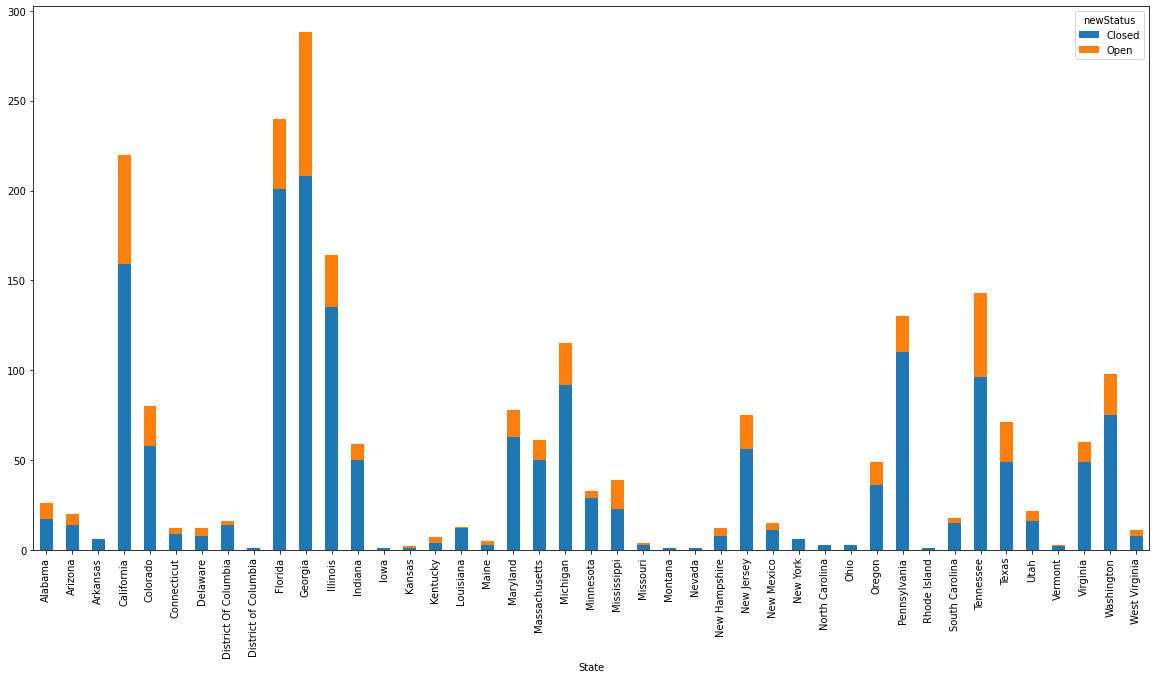

In [34]:
State_Complaints.plot(kind='bar', figsize=(20,10),stacked=True)

# Which state has the maximum complaints

In [87]:
dummy_max_state=df.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename(columns={0:"Count"}).head(1)
dummy_max_state

,State,Count
0,Georgia,288


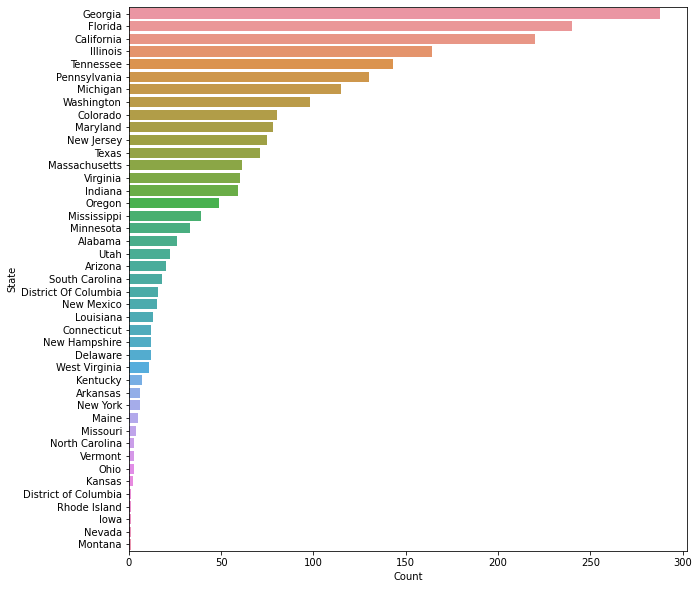

In [92]:
dummy_max_state_total=df.groupby(["State"]).size().sort_values(ascending=False).to_frame().reset_index().rename(columns={0:"Count"})
fig, ax = plt.subplots(figsize=(10, 10))
dummy_state=sns.barplot(y=dummy_max_state_total['State'], x=dummy_max_state_total['Count'],ax=ax)


In [36]:
State_Complaints_new= df.groupby(["State","newStatus"]).size().reset_index().rename(columns={0:'Count'})
State_Complaints_new

,State,newStatus,Count
0,Alabama,Closed,17
1,Alabama,Open,9
2,Arizona,Closed,14
3,Arizona,Open,6
4,Arkansas,Closed,6
...,...,...,...
72,Virginia,Open,11
73,Washington,Closed,75
74,Washington,Open,23
75,West Virginia,Closed,8


# Which state has the highest percentage of unresolved complaints


In [37]:
State_Complaints_new[(State_Complaints_new.Count==max(State_Complaints_new[(State_Complaints_new.newStatus=='Open')].Count))&(State_Complaints_new.newStatus=='Open')]

,State,newStatus,Count
19,Georgia,Open,80


# Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [54]:
dummy_complaints_received= df.groupby(['Received Via','newStatus']).count()['City'].reset_index().rename(columns={'City':'Count'})
dummy_complaints_received

,Received Via,newStatus,Count
0,Customer Care Call,Closed,864
1,Customer Care Call,Open,255
2,Internet,Closed,843
3,Internet,Open,262


In [85]:
dummy_resolved_complaint_percentage=np.array((dummy_complaints_received.Count[((dummy_complaints_received['Received Via']=='Internet')|
                               (dummy_complaints_received['Received Via']=='Customer Care Call' ))&
                                (dummy_complaints_received['newStatus']=='Closed')].sum()* 100/dummy_complaints_received.Count.sum()))

In [86]:
print('The percentage of complaints resolved is {:.2f} %'.format(dummy_resolved_complaint_percentage))

The percentage of complaints resolved is 76.75 %
